In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

import cartopy.crs as ccrs

### Simple plotting routines

In [23]:
class plot_tools:
    def __init__(self, central_longitude=0.):

        self.central_longitude = central_longitude

        self.trans = ccrs.PlateCarree()
        self.proj = ccrs.PlateCarree(central_longitude=self.central_longitude,
                                     globe=None)

        self.fig = plt.figure(figsize=(9, 6))
        self.ax = plt.subplot(111, projection=self.proj)

        ###

        self.fs = 13
        self.title_fs = 14
        
    def settings(self, field, diff=False):

        cmap = plt.get_cmap('RdBu_r')
        levels = 10
        label = ''

        if field in ['t2m', 'TS']:
            label = 'Surface temperature [$^\circ$C]'
            cmap = plt.get_cmap('RdBu_r')
            levels = [-30., -25., -20., -15., -10., -5.,
                      5., 10., 15., 20., 25., 30.]        

            if diff is True:
                label = 'Surface temperature anomaly [$^\circ$C]'
                cmap = plt.get_cmap('RdBu_r')
                levels = [-18., -15., -12., -9., -6., -3.,
                          3., 6., 9., 12., 15., 18.]

        if field in ['topo', 'srfgeo']:
            label = 'Topography [m]'
            cmap = plt.get_cmap('RdBu_r')
            # levels = np.linspace(500., 5000., 10)
            levels = [1000., 2000., 3000., 4000., 5000.]

            if diff is True:
                label = 'Topography anomaly [m]'
                cmap = plt.get_cmap('RdBu_r')
                levels = np.linspace(-1000., 1000., 11)

        return cmap, levels, label
    
    
    
    def quick_plot(self, lat, lon, var):

        lons,lats=np.meshgrid(lon,lat)
        levels=10
        cmap=plt.get_cmap('RdBu_r')
    
        cf=self.ax.contourf(lons,lats,var,levels,extend='both',cmap=cmap,transform=self.trans)
        
        cbar=self.fig.colorbar(cf,shrink=0.75,orientation='horizontal') # colorbar
        
        self.ax.coastlines()
        self.ax.set_global() # generally good to set for global datasets
        
        plt.show()
    

#   ### ### ### ### ### ### ### ### ### ### ###

    def plot_field(self, lat, lon,
                   var_cf=None, field_cf=None, diff_cf=False,
                   var_cr=None, field_cr=None, diff_cr=False,
                   title='',
                   save=False, ofile=None):

        lons,lats=np.meshgrid(lon,lat)
        
        cmap_cf, levels_cf, label_cf =self.settings(field=field_cf, diff=diff_cf)
        
        norm_cf=BoundaryNorm(levels_cf,ncolors=cmap_cf.N, clip=True)
                            
        cf = self.ax.contourf(lons,lats,var_cf,levels_cf,
                           cmap=cmap_cf,norm=norm_cf,
                           extend='both',
                           transform=self.trans)
        
        self.ax.coastlines()
        self.ax.set_global()
        self.ax.gridlines()                     
                             
        plt.show()
                        
        
                          

### Example plotting routines

Working on month Jan


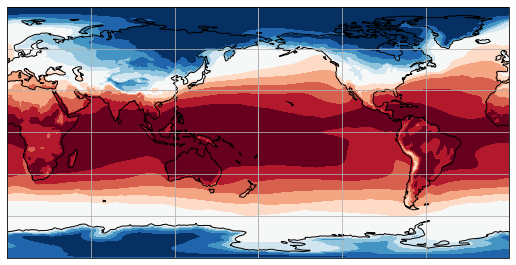

In [24]:
diff_cf = False
diff_cr = False

save = False

opath = '.'
title = ''

###

dfile = '../data/ERAInt.t2m.ltm.0.75x0.75.nc'
ds_ts = xr.open_dataset(dfile)

field_cf = 't2m'
var_cf = ds_ts[field_cf]-273.15
# var_cf -= np.mean(var_cf, axis=-1)
# diff_cf = True

lat = ds_ts['latitude']
lon = ds_ts['longitude']

###

dfile = '../data/ERAInt.surf_geopot.0.75x0.75.nc'
ds_topo = xr.open_dataset(dfile)

field_cr = 'srfgeo'
var_cr = ds_topo[field_cr][0]/9.8

###

dfile = '../data/ERAInt.surf_geopot.0.75x0.75.nc'
ds_topo = xr.open_dataset(dfile)

field_cr = 'srfgeo'
var_cr = ds_topo[field_cr][0]/9.8

###

central_longitude = -180.

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

mons = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mons = [0]

# save = True

for mon in mons:
        
    print('Working on month {}'.format(months[mon]))

    pp = plot_tools(central_longitude=central_longitude)

    if diff_cf is False:
        ofile = '{}/{}_{}'.format(opath, field_cf, months[mon])
    else:
        ofile = '{}/anomaly_{}_{}'.format(opath, field_cf, months[mon])

    title = months[mon]

    
    pp.plot_field(lat, lon,
                  var_cf=var_cf[mon], field_cf=field_cf, diff_cf=diff_cf,
                  var_cr=var_cr, field_cr=field_cr, diff_cr=diff_cr,
                  title=title,
                  save=save, ofile=ofile)
    

        
   # pp.quick_plot(lat, lon, var_cf[mon])